In [1]:
import pandas as pd

In [2]:
import numpy as np


In [5]:
import pandas as pd

df = pd.read_csv("/content/placement.csv")


In [6]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [7]:
df.shape

(100, 4)

In [8]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [10]:
df = df.iloc[:,1:]

In [11]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [12]:
import matplotlib.pyplot as plt

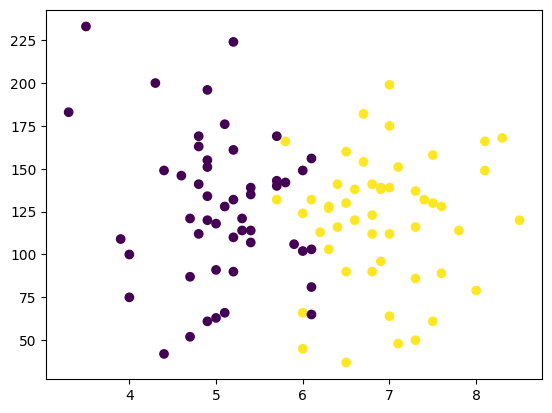

In [13]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [14]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [15]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [16]:

y.shape

(100,)

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [18]:
X_train

,cgpa,iq
26,7.0,199.0
97,6.7,182.0
65,8.1,166.0
28,5.2,90.0
57,6.5,130.0
...,...,...
40,4.9,134.0
75,4.8,169.0
18,4.0,100.0
23,4.7,87.0


In [19]:

y_train

,placement
26,1
97,1
65,1
28,0
57,1
...,...
40,0
75,0
18,0
23,0


In [20]:
X_test

,cgpa,iq
72,7.3,116.0
25,5.0,91.0
12,5.4,139.0
82,6.5,37.0
69,8.5,120.0
84,5.7,169.0
32,7.0,139.0
13,6.4,116.0
68,4.0,75.0
7,5.0,63.0


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:

X_train = scaler.fit_transform(X_train)

In [24]:
X_train

array([[ 0.906668  ,  1.8616008 ],
       [ 0.63971014,  1.4311566 ],
       [ 1.8855135 ,  1.02603266],
       [-0.69507918, -0.89830608],
       [ 0.46173823,  0.11450378],
       [-0.96203704, -1.63259323],
       [-2.2078404 ,  2.72248918],
       [ 0.10579441, -1.1261883 ],
       [ 0.37275228,  0.39302649],
       [-2.38581231,  1.45647685],
       [ 0.55072418,  0.31706575],
       [ 0.01680846, -0.59446312],
       [-1.2289949 ,  0.51962773],
       [ 1.35159777,  0.82347069],
       [ 0.46173823,  0.87411118],
       [-1.05102299,  0.39302649],
       [ 1.61855564, -0.29062016],
       [-0.51710727, -0.29062016],
       [-1.05102299,  0.95007192],
       [-1.49595276,  1.88692104],
       [ 1.17362586, -0.99958707],
       [ 0.28376632,  0.03854304],
       [-0.0721775 , -0.49318214],
       [-0.87305108, -0.18933918],
       [ 0.55072418, -0.13869868],
       [ 1.26261182,  0.16514428],
       [ 0.81768205,  0.31706575],
       [ 0.01680846, -1.505992  ],
       [ 0.72869609,

In [25]:
X_test = scaler.transform(X_test)

In [26]:

X_test

array([[ 1.17362586, -0.23997967],
       [-0.87305108, -0.87298584],
       [-0.51710727,  0.342386  ],
       [ 0.46173823, -2.24027915],
       [ 2.24145732, -0.13869868],
       [-0.2501494 ,  1.1019934 ],
       [ 0.906668  ,  0.342386  ],
       [ 0.37275228, -0.23997967],
       [-1.76291063, -1.27810978],
       [-0.87305108, -1.58195274]])

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
clf = LogisticRegression()


In [29]:

# model training
clf.fit(X_train,y_train)


LogisticRegression()

In [30]:
y_pred = clf.predict(X_test)

In [31]:
y_test


,placement
72,1
25,0
12,0
82,1
69,1
84,0
32,1
13,1
68,0
7,0


In [32]:
from sklearn.metrics import accuracy_score

In [33]:

accuracy_score(y_test,y_pred)

1.0

In [34]:

from mlxtend.plotting import plot_decision_regions

<Axes: >

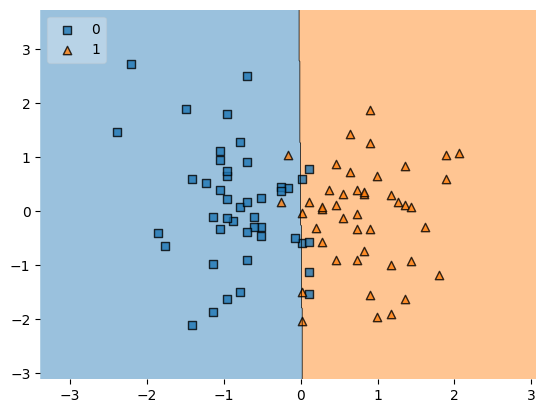

In [35]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [36]:
import pickle

In [37]:

pickle.dump(clf,open('model.pkl','wb'))